## Vehicle Silhouette Identification

CONTEXT: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

DATA  DESCRIPTION: The  data  contains  features  extracted  from  the  silhouette  of  vehicles  in  different  angles.  Four  "Corgie"  model  vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.•All the features are numeric i.e. geometric features extracted from the silhouette

In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

%matplotlib inline

### 1. Import datasets

In [4]:
vehs = pd.read_csv('Part3 - vehicle.csv')

In [5]:
print(f"Shape: {vehs.shape}")

Shape: (846, 19)


In [6]:
vehs.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [8]:
vehs.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [10]:
vehs['class'].unique()

array(['van', 'car', 'bus'], dtype=object)

There are no mistakes in tag names

In [12]:
vehs['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

Slightly imbalanced to have more car datapoints


## EDA

In [13]:
vehs.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [14]:
## Check for missing values
pd.DataFrame(vehs.isnull().sum(), columns=['No. of missing values'])

No. of missing values
compactness                                      0
circularity                                      5
distance_circularity                             4
radius_ratio                                     6
pr.axis_aspect_ratio                             2
max.length_aspect_ratio                          0
scatter_ratio                                    1
elongatedness                                    1
pr.axis_rectangularity                           3
max.length_rectangularity                        0
scaled_variance                                  3
scaled_variance.1                                2
scaled_radius_of_gyration                        2
scaled_radius_of_gyration.1                      4
skewness_about                                   6
skewness_about.1                                 1
skewness_about.2                                 1
hollows_ratio                                    0
class                                            0

In [15]:
vehs= vehs.dropna()

In [16]:
pd.DataFrame(vehs.isnull().sum(), columns=['No. of missing values'])

No. of missing values
compactness                                      0
circularity                                      0
distance_circularity                             0
radius_ratio                                     0
pr.axis_aspect_ratio                             0
max.length_aspect_ratio                          0
scatter_ratio                                    0
elongatedness                                    0
pr.axis_rectangularity                           0
max.length_rectangularity                        0
scaled_variance                                  0
scaled_variance.1                                0
scaled_radius_of_gyration                        0
scaled_radius_of_gyration.1                      0
skewness_about                                   0
skewness_about.1                                 0
skewness_about.2                                 0
hollows_ratio                                    0
class                                            0

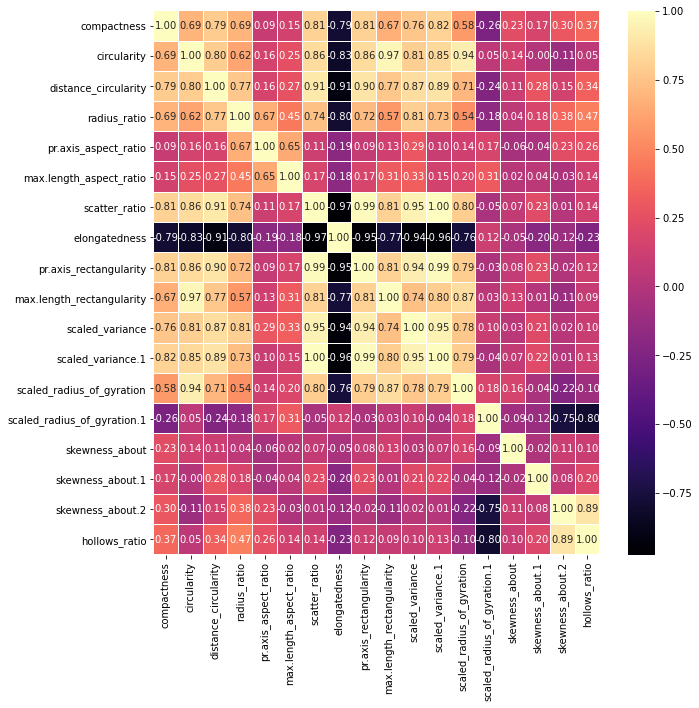

In [17]:
fig,ax = plt.subplots(figsize=(10, 10))  
numeric_cols = vehs.select_dtypes(include=[np.int64, np.float64]).columns
sns.heatmap(vehs[numeric_cols].corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

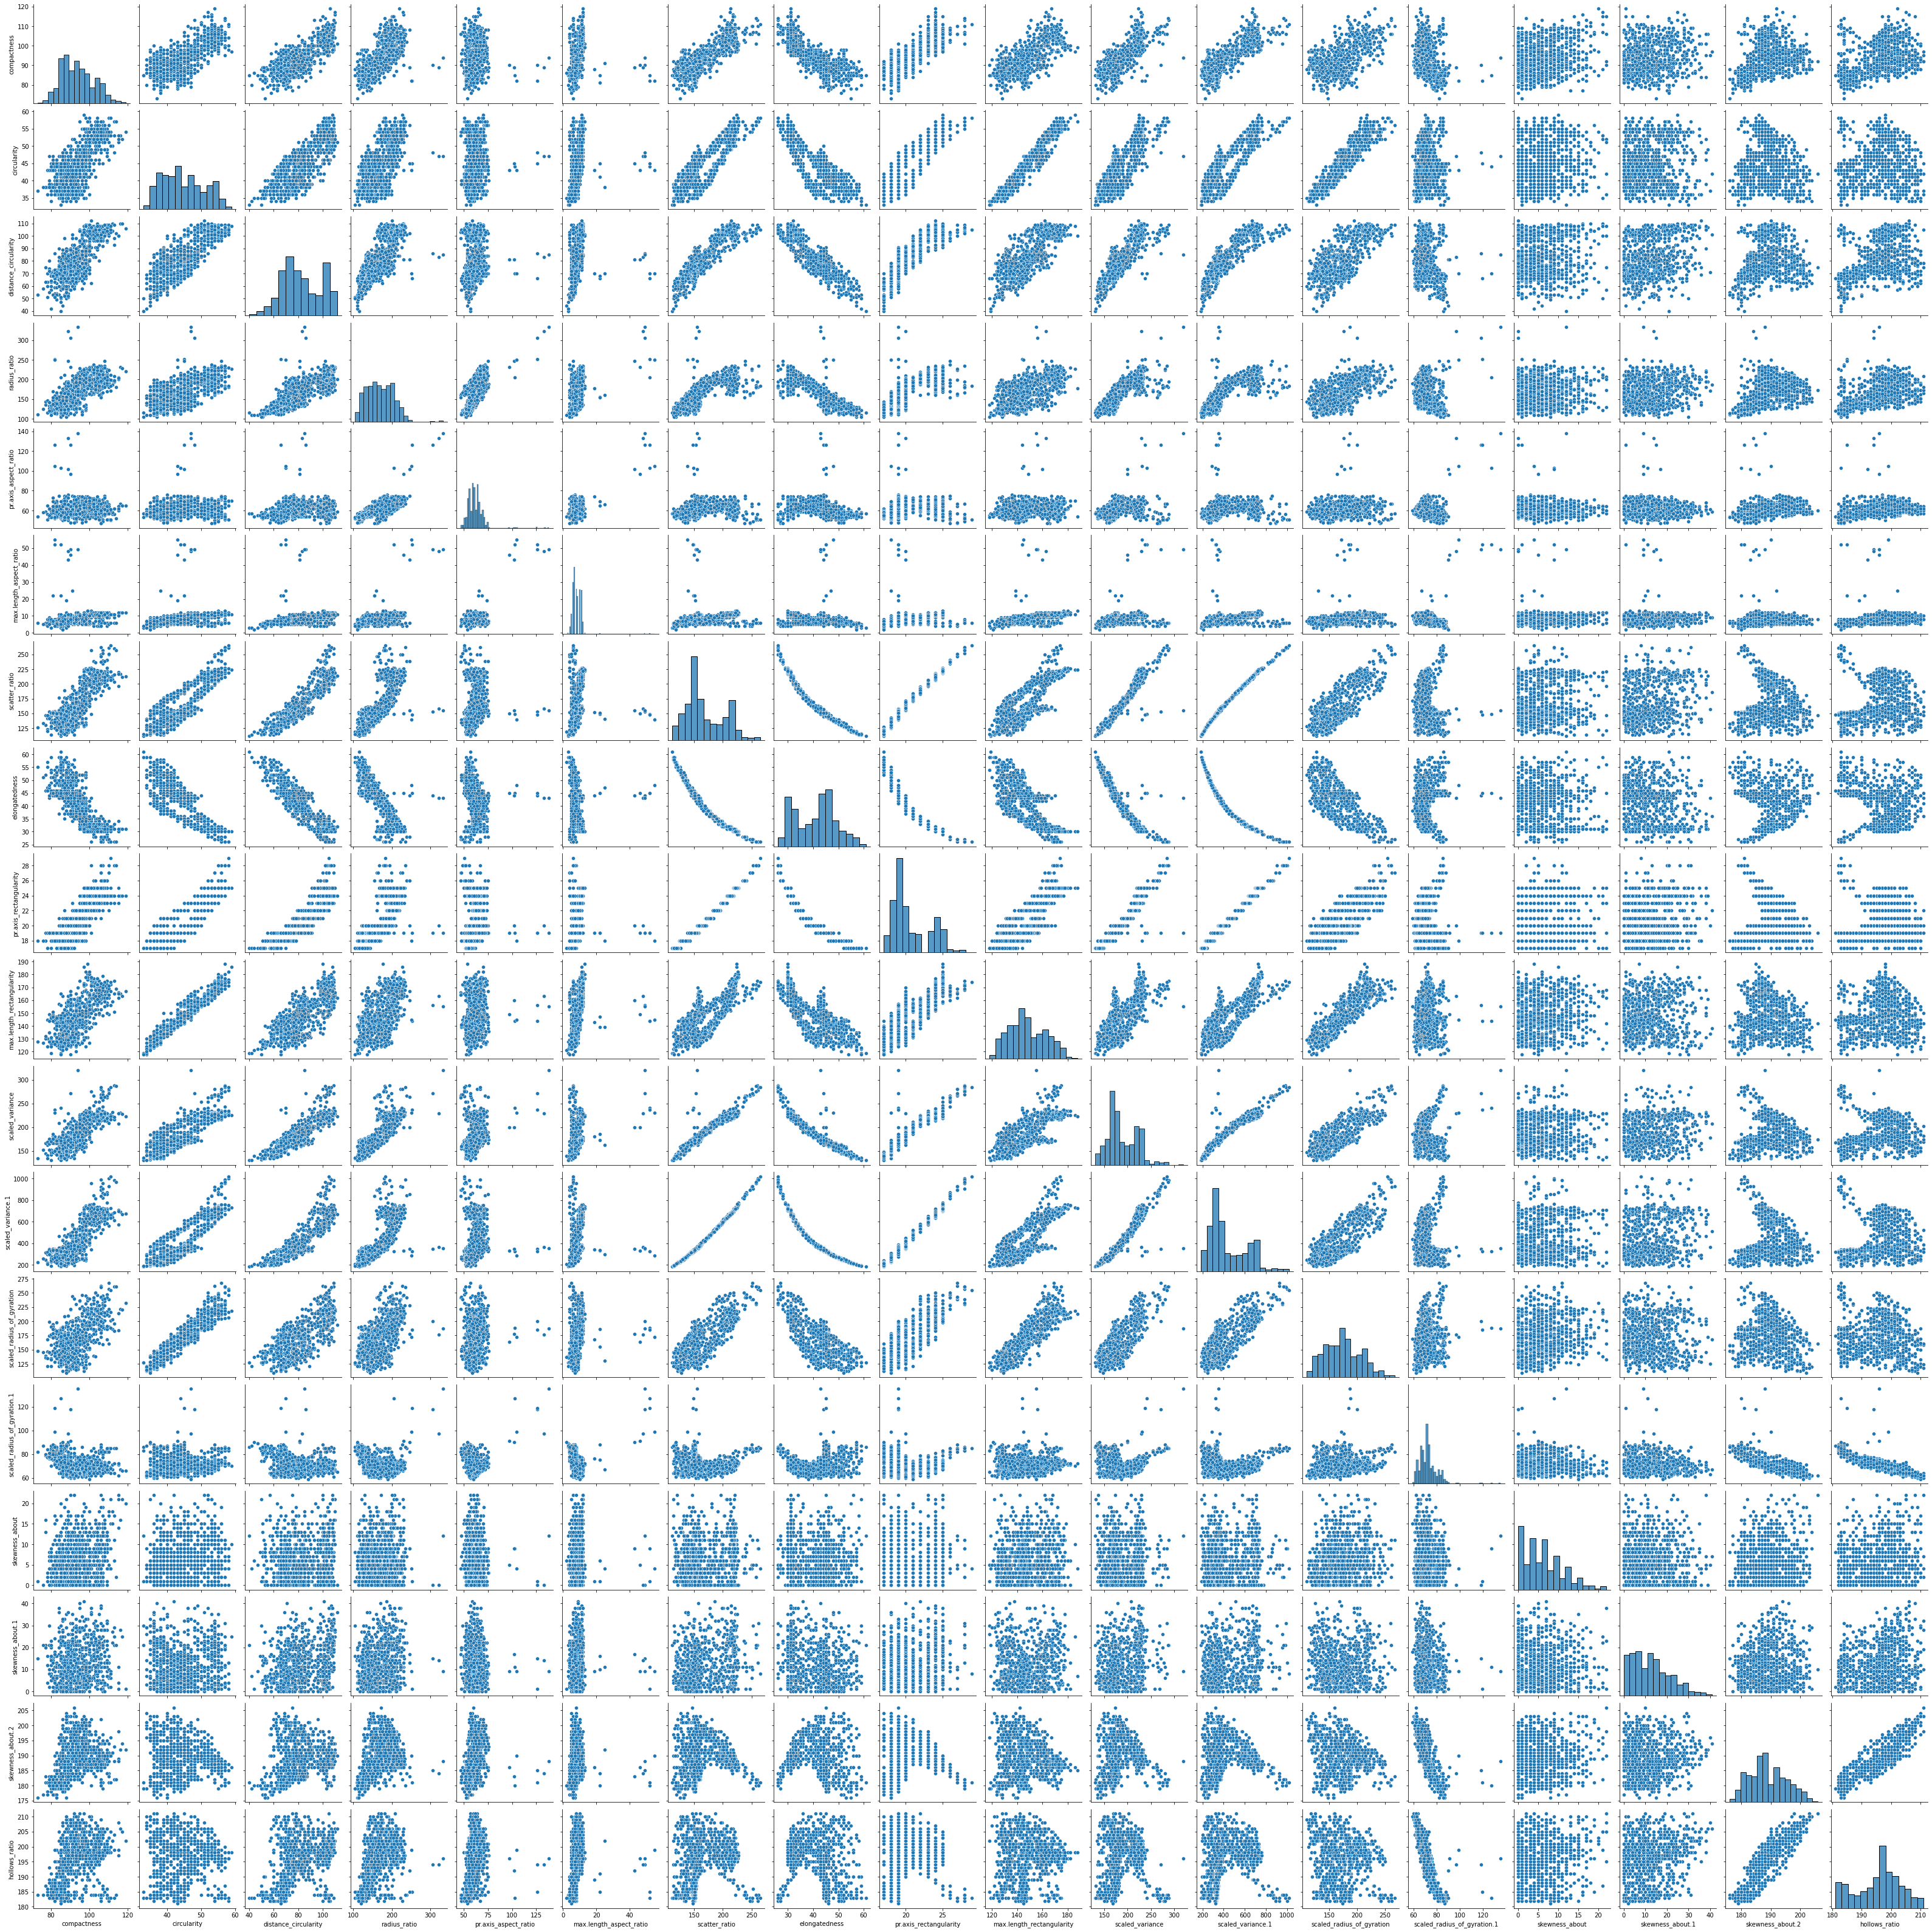

In [25]:
sns.pairplot(vehs)

<AxesSubplot:>

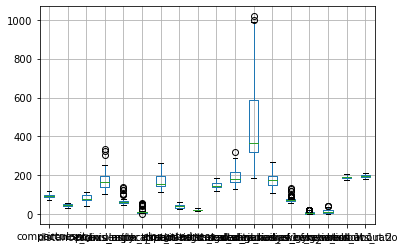

In [18]:
##Check for outliers
vehs.boxplot()

In [23]:
veh_c = vehs[numeric_cols].copy()
Q1 = veh_c.quantile(0.25)
Q3 = veh_c.quantile(0.75)
IQR = Q3 - Q1
# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(veh_c < Q1 - 1.5 * IQR)[0], np.where(veh_c < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    veh_c.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(veh_c > Q3 + 1.5 * IQR)[0], np.where(veh_c > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    veh_c.iloc[i,j] = whisker[j]

<AxesSubplot:>

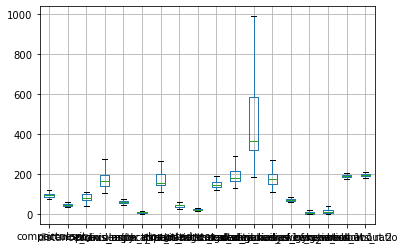

In [24]:
veh_c.boxplot()

outliers have been removed

###  Apply SVM

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X = vehs[numeric_cols].copy()
y = vehs['class']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 123)
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [29]:
scr = clf.score(X_test, y_test)
print(f"Accuracy: {scr}")

Accuracy: 0.9656862745098039


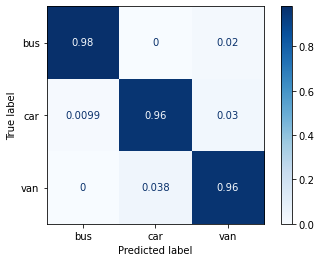

In [32]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues,normalize='true');
plt.grid(False)

Apply PCA

In [ ]:
## Applying scaling using z-score
from scipy.stats import zscore
X_std = X.apply(zscore)

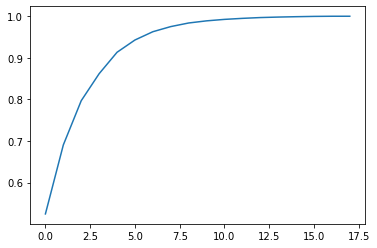

In [39]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

We see a flattening of the curve from around 7.5-9

In [43]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_std)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, random_state=123)

In [47]:
clf_pca =  SVC(gamma='auto')
clf_pca.fit(X_train_pca, y_train_pca)

SVC(gamma='auto')

Accuracy 0.9313725490196079


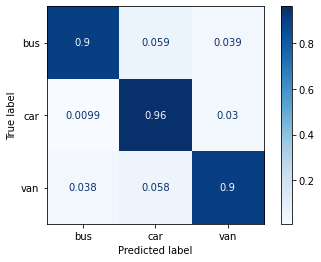

In [48]:
print(f"Accuracy {clf_pca.score(X_test_pca,y_test_pca)}")
disp = plot_confusion_matrix(clf_pca, X_test_pca, y_test_pca, cmap=plt.cm.Blues,normalize='true');
plt.grid(False)

The benefits of using PCA over a very large dataset usually includes
1. Reduced features, hence lower computation time
2. Standardisation of data points
3. Might improve accuracy score